## 0409

`matplotlib` 3.0.0 버전에서 3D 그래프가 작게 그려지는 버그 등이 있어서 2.2.3을 사용합니다.

In [4]:
%load_ext watermark
%watermark -v -p sklearn,numpy,scipy,matplotlib

ModuleNotFoundError: No module named 'watermark'

In [ ]:
from preamble import *

## 지도 학습
### 분류와 회귀

### 일반화, 과대적합, 과소적합

- 데이터가 부족하면? 부족한 일반화.
- 데이터가 충분하면? 더 좋은 일반화 가능

##### 모델 복잡도와 데이터셋 사이즈의 관계

### 지도 학습 알고리즘

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import mglearn

In [2]:
from matplotlib import font_manager
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# font_name = font_manager.FontProperties(fname="NanumBarunGothic.ttf").get_name()
plt.rc('font', family=font_name)
plt.rcParams["font.family"] = font_name
plt.rcParams['axes.unicode_minus'] = False

#### make_forge()
- 15개씩 존재하는 2가지 군집(cluster)을 만듦. center = 2, samples = 30
- cluster_std : 군집의 분산
- plot - aspect : 'equal' scale을 동등하게 만듦.

In [ ]:
# 데이터셋을 만듭니다 (2개의 cluster 만듦.)
X, y = mglearn.datasets.make_forge()

# 산점도를 그립니다
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["class 0", "class 1"], loc=4)
plt.set_aspect('equal')
plt.xlabel("the feature of first")
plt.ylabel("the feature of second")
print("X.shape: {}".format(X.shape))

In [ ]:
X, y = mglearn.datasets.make_wave(n_samples=40)
print(X.shape, y.shape)

In [ ]:
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("feature")
plt.ylabel("target")

### cancer data

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))

In [ ]:
print("유방암 데이터의 형태: {}".format(cancer.data.shape))

In [ ]:
print("클래스별 샘플 갯수:\n{}".format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

- 아래처럼 scikitlearn datasets는 dictionary와 유사하지만 dataframe과 유사하게 사용가능.

In [ ]:
print("특성 이름:\n{}".format(cancer.feature_names))

### 회귀분석용 데이터

In [57]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태: {}".format(boston.data.shape))

데이터의 형태: (506, 13)


In [58]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

- mglearn : 가상 데이터 ; 알고리즘 설명을 하기 위함.
- sklearn : 실제 데이터 ; dict의 key들을 가짐 (data, target, f_n, t_n), 데이터를 설명하기 위함. 모델을 돌리기 위한 sample data

In [59]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


### feature engineering (변수 변환) : 새로운 의미 있는 결론을 얻기 위함.
- 고차원, 변수들 간의 연관성이 큰지 알아보기 위함.
    - boston's target value = 1000달러 단위의 소유 주택의 평균값.
    - 13개의 입력 속성 이외에도 각 속성 간 cross production도 포함
    - 중복을 허용한 두 개 속성 : 13 + 13*12/2 = 13 + 78 / n의 제곱 + n(n+1) / 2
    - 전체 속성 수 : 13 + 13 + 78 = 104 개
- 회귀 : 연속형 변수들에 대한 식.

- 통계 : 선형회귀 만든 후 유의미한 p값을 찾음. 그리고 그 p값들을 따로 뽑아서 새로 선형회귀식 만듦
- ML : 신뢰구간을 고려하지 않음. 결과가 좋으면 그만...?

### k-최근접 이웃(KNN)
#### k-최근접 이웃 분류
- 최근접 이웃이 가장 많이 속해있는 집단으로 분류하는 기법
- 일반적으로 유클리드 거리를 사용한다. <- 설명변수의 표준화
- 편향 변화량 균형 (bias-variance tradeoff)
    - k값이 적으면 noise, outlier에 영향 받는다.
    - k값이 많으면 대수의 범주로 편향된다.
    - 효과적인 k의값 (홀수)
        - 보통 3~11
        - 훈련 data 개수의 n 제곱근
        - 가장 작은 범주 개체수 m의 제곱근
        - 큰 k값 + 거리에 따른 가중치
- 유사도 측정 시 고려해야할 요소
    - 거리 측정 방법
    - 가중치
    - 측정 단위 (단위에 따라 가장 가까운 이웃이 바뀔 수도 있음.), 즉 단위가 가지는 의미를 없애준다.
- feature들의 scale(단위)가 같아야 한다.

- Minkowski (표준 거리)
- 맨하튼 : Minkowski 에서 m = 1, 즉 p = 1, weight = 속도
- 뉴클리드 : Minkowski 에서 m = 2, 즉 p = 2 

#### 거리 표준화 방법 ( 제일 중요함 )
- 최소-최대 정규화 : Normalize / 값이 0과 1사이
- Z-score 표준화 : standarize / 값의 범위가 평균이 0, 분산이 1
- data값의 최대 최소에 제약 여부에 따라
    - 제약 O : Normalize ex) RGB
    - 제약 X : standarize ex) 속도, 몸무게

#### 범주형 변수
- binary 분포로 변경한다.
- one-hot encoding

#### 특징
- 게으른 알고리즘 - 학습하지 않는다.
- 훈련 instance에 의존함
    - instance-based learning
    - 암기학습 rote learning
- 모델을 생성하지 않는다.
    - 데이터에 대한 학습이 없어, 비모수 학습 기법
- 알고리즘 : auto, ball_tree, kd_tree, brute / auto : scikitlearn이 데이터에 따라 자동으로 적용
    - ball_tree : 가까운 거리의 데이터 마다 그룹을 지어서 그룹 간 구심점 거리 측정. 대부분 성능이 좋음.
    - kd_tree : ball_tree와 비슷하지만 데이터가 많을 때는 ball_tree를 사용한다. 적당한 data 일 때 사용.
    - brute(욕심쟁이) : X-train 데이터가 n개 일 때, 새로운 data가 1개가 들어왔을 때, 모든 n개의 데이터와 거리 측정

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

- knn 알고리즘의 적용 방법을 확인

In [ ]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
print("테스트 세트 예측: {}".format(clf.predict(X_test)))

In [ ]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

#### KNeighborsClassifier 분석

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} n_neighbors".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="train accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

- 왼쪽 : overfitting
- 오른쪽 : underfitting

### k-Neighbors Regression
- KNN으로 분류뿐만아니라 회귀도 가능하다.

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다
reg.fit(X_train, y_train)

In [ ]:
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))

In [ ]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

#### KNeighborsRegressor 분석

In [ ]:
# reshape(-1, 1) : data shape 바꿀 때, 1개의 축만 정하면 자동으로 대체하게 해줌.
np.linspace(-3, 3, 1000).reshape(-1, 1).shape

- scikitlearn에서 처리하는 데이터는 대부분 n.sample * n.feature로 되어 있는 2차원이기 때문에 reshape를 해줘야함
- axis = 0, 즉 row단위로 하나의 dataset을 간주하므로, line을 reshape(-1,1)로 주었음.

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} n_neighbor's train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Train data/target", "Test data/target"], loc="best")

- n.jobs : core의 개수 설정 / None : 1임, -1로 설정 시 모든 코어 사용
- 특히나 훈련 데이터가 많아지면 n_jobs를 늘리고, algorithm을 ball_tree 등으로 설정하는 것 권장.
- 고차원의 데이터에서는:
    - 데이터를 전처리하여, 정규화 한 후
    - KNN을 사용하거나 SVM 등을 사용하는 것이 더 권장된다.

#### 회귀에서의 좋고 나쁨의 기준은 ?
- SST : sum of squared total / 기대값 - 평균
- SSE : sum of squared error / 기대값 - 오차
- SSR : sum of squared regression
- 에러가 작으면 작을 수록 결정계수인 R의 제곱은 커진다.  R2 : SSR / SST == 1 - SSE / SST
- 실제값과 기대값과의 상관계수의 제곱 == R의 제곱

#### 장단점과 파라메타
- 회귀 계수의 score == R의 제곱
- R의 제곱이 클수록, 예를 들어 0.8 이상일 때는 상관계수가 0.9가 된다는 말이다. 0.9 * 0.9 = 0.81
- R의 제곱 == 0.6, 상관계수가 0.8 정도 된다.

___
# 0410
### 선형 모델
- 선형회귀 : 통계 : y = ax+b, ML : y = Wx+b+e
    - w, b : 학습 parameter
    - y : target
    - x : feature
    - e : 잡음(noise), 우연적 오류
    - 결론 : y의 기대값을 구하는 것.
    - Loss가 작으면 작을 수록 좋은 모델이 된다.
    - 미분해서 기울기가 0이 되는 지점을 찾자.
    - w와 b의 미분에 대해서 증명해보장
        - SST = 전체 변동량 ( n * 분산 )
        - SSE = Loss
        - SSR = 모델의 변동량
        - SSE = SST - SSR
        - SST - SSE = SSR
        - 1 - SSE/SST = R의 제곱 == 상관계수의 제곱
    - 선형회귀 식의 변수가 p개라면 SSR의 자유도 = p(평균을 사용했으므로 -1), SSE = n-1-p, SST = n-1
        - y의 기대값 = p개의 변수 + e = p + 1 개의 자유도 가짐.
- feature를 늘리면 늘릴수록 Loss도 낮아지고 고정된 결정계수도 올라가지만, 실제 y 예측값은 떨어질 수 있다.
     - R의 제곱(adj) = 1 - SSE/(n-p-1) / SST/(n-1), 즉, n은 고정 p가 늘면 늘수록 R의 제곱이 작아짐.
- 그래프에서 축의 위치를 가운데로 이용하기 위해 spines 객체를 사용하였다.
    - spine은 data 영역의 boundary를 나타내는 데 사용하며, axes tick 마커를 연결한다.
    - spine은 축이 움직이는 그래프
- 참고 할 것
    - 1. 종속변수(y)와 설명변수(features)는 선형관계이다.
    - 2. 설명변수들은 정규분포를 가지며 서로 독립이다.
        - 독립 : 변수 간 상관계수가 0
        - 회귀 계수 w를 조절할 때, 서로 독립이 아닌 경우 서로 간에 영향을 미치면서 overfitting 된다.
        - 변수 변환 시 : skewed된 데이터의 경우 log를 취하거나 어떠한 변화를 줘서 정규분포로 만들어줘야 한다.
        - PCA : PCA로 변환시키면 각각의 의미를 찾기 어렵다.
    - 3. 잔차(에러) : 실제 값 - 예측 값 = 잔차(에러), [가정] : 잔차는 서로 독립이다. 또한, 평균은 0이며 정규분포를 이룬다.
#### 선형 회귀 모델
\begin{align*}
\end{align*}

- 아래 그래프의 식 y = x + sin(4x) + N(0, 1)

In [ ]:
mglearn.plots.plot_linear_regression_wave()

- error를 최소화하는 직선을 그린다.

- 평균을 취했으므로 MSE (Mean Square Error)

#### Linear regression(선형회귀)
- 최소제곱법
- 거리를 측정하는 방식이 아니므로 normalize 필요 X
- fit intercept : True, Wx+b에서 b를 사용할 것인가.
- 표준화 할 때, scikitlearn의 내장함수인 scale, normalize를 사용하자.

In [ ]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [ ]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

In [ ]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

In [ ]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [ ]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

- 훈련셋에 비해 테스트 셋의 score가 낮다는 의미는 overfitting이 되었다는 뜻. 과도하게 훈련됨.
- 이를 줄이기 위해 릿지 회귀를 사용하자

#### Ridge regression(릿지 회귀)
- 선형회귀의 Loss를 사용했더니 overfitting이 되었다.
- 이러한 Loss 식에 패널티를 부여한 것.
- a||w||2 == 1, 즉 a를 높이면 w가 줄어듬
- a == L2 Regularization
- n을 2배 늘리고, w의 제곱의 절댓값을 더해주기.
    - 즉, w(회귀계수)를 높이면 높일수록 Loss가 커지도록 만드는 패널티 부여
- 다중공선성 : feature 간의 관계가 강한 상관관계일 때.
    - 이를 방지하기 위해 릿지 사용
    - 해결 방법은 릿지 회귀 사용 : w(회귀 계수)를 최대한 줄여줌.
- max_iter : epoch 수, L(w0) : w0 - (d/dw L / w0) * learning_rate 
- tol = 소숫점 00자리까지 볼 것. layer가 깊어질수록 늘려준다. 
- solver = 'auto', 'svd', 'lsqr' 등등 data를 어떤 방식으로 연산할지 정하기위해 사용.
    - cholesky : X.t * X == 대칭정칙 행렬 분해에 사용
    - sag(Stochastic Average Gradient descent)
    - saga : sag Advanced
- 여러 옵션들은 계속해서 읽어보고 참고할 것.
- 많은 모델이 w 최적화를 위해 iteration을 사용하지만 중단 방법은 다양할 수 있다.

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

In [ ]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

- 1에서 10으로 올렸더니 역효과가 났음.

In [ ]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

- 1에서 0.1로 줄였더니 더 좋아졌음.

In [ ]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

In [ ]:
mglearn.plots.plot_ridge_n_samples()

- Training set size에 따른 R square 값의 변화
- 400개 이상부터 의미있게 적용됨.
- 통계에서는 변수를 넣고, 빼면서 적용했었음.
- ML에서는 변수를 건드리지 않음.
- 학습데이터가 늘어 날 수록, SSR이 충분히 SST를 설명하지 못함을 나타낸다.
- ridge는 연산 시간이 상대적으로 크다. 따라서 학습데이터의 양이 충분히 많다면 LR, Lasso를 사용하자.

#### Lasso
- L1 Regularization을 사용한다.
- scikitlearn 홈페이지에 guide가 나와 있으니 자주 읽어볼 것.
- 기본적으로 coordinate descent 알고리즘 사용.
    - 각 좌표계 방향에서 한 방향씩으로만 번갈아 가면서 gradient descent 하는 것.
    - Coordinate descent 매 데이터가 들어올 때, n번째 데이터에 대해서 n번째 회귀계수만 업데이트 시킴.
    - 계산량이 적기 때문에, 데이터가 크면 연산 속도가 빠르다.
- ridge의 alpha 대신에 beta||w|| 사용
- ridge는 square를 사용했기 때문에 실제 영향은 square만큼이므로, w가 적당히 작아도 Loss를 충분히 줄일 수 있다.
- but Lasso는 square가 아니므라, w값을 충분히 줄여야 Loss를 줄일 수 있다.
- ridge는 |w|를 작게해준다면, Lasso는 회귀계수를 0에 가까이 줄이므로 sparsity하게 하는 효과를 갖는다.
- 의미없는 w들은 대부분 0으로, 중요한 w들만 남긴다.
- target에 영향을 적게 미치는 feature들을 찾아내므로 Lasso를 더 많이 사용한다.
- 데이터의 변수들 중 대부분이 영향이 없다? Lasso 전부 다 중요하면? Ridge

#### Option
- alpha : L1 계수
- precompute : 속도향상을 위해 사전에 계산된 Gram matrix 사용여부를 지정. 공분산 행렬,
- sparse input에 대해서는 항상 True로 설정. 메모리가 충분하다면 사용, 부족할 시 사용 X
- tol
- warm_start : 이전에 fit의 parameter를 초기화 값으로 사용.
- positive : 회귀계수를 강제로 양수로 만듦. 음의 회귀계수를 고려해야하므로 True는 지양할 것.
- selection : 학습할 회귀계수를 지정할 수 있음.
    - 따라서 초기에는 'random'으로 설정하고, 이후 'warm_start'를 설정한 후, 'cyclic'을 시도할 만 하다.

#### 속성
- sparse_coef_ : 메모리 절약 가능. 

___
- boston housing 데이터에 적용해보자.

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso.coef_ != 0)))

In [ ]:
# "max_iter" 기본 값을 증가시키지 않으면 max_iter 값을 늘이라는 경고가 발생합니다
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso001.coef_ != 0)))

- alpha를 줄이면 0에 가까운 w들을 좀 더 살려서 사용할 특성의 수가 늘어난다.

In [ ]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso00001.coef_ != 0)))

In [ ]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000, normalize=True).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso00001.coef_ != 0)))

- normalize를 사용해보자

In [ ]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

### 참고
- ElasticNet : L1, L2 손실을 모두 제공함. Lasso + Ridge
- 실행을 용이하게 하고 싶다? Lasso
- normalize 적용 여부에 따라 feature의 w값이 변화한다.
- normalize를하면 w값을 줄일 수 있다.

## 0411 : Linear models for classification
- ML에서 Loss는 art, 즉, Loss를 어떻게 다루냐에 따라 model을 좋게 만들 수 있음.
- 회귀 문제의 해는 target과 features X가 구성하는 공간에서 X와 y의 관계식인 hyperplane이고,
- 분류 문제의 해는 입력 features X 공간에서 target y를 분류하는 결정 경계(decision loundary)인 hyperplane이다.
- hyper plane은 보통 f(X) = 0이며, y > 0.5 인 구간 : class 1, y < 0.5 인 구간 : class 0

#### 모델 최적화 하는법
- for penalty in [L1, L2]
    - for c in [c의 범위]

#### 분류에 대한 선형 모델

사이킷런 0.19 버전 이하에서는 `LinearSVC`와 `liblinear`를 사용하는 `LogisticRegression`의 `verbose` 매개변수가 0이 아니고 `max_iter` 반복 안에 수렴하지 않을 경우 반복 횟수를 증가하라는 경고 메세지가 나옵니다. 사이킷런 0.20 버전부터는 `verbose` 매개변수에 상관없이 `max_iter` 반복 안에 수렴하지 않을 경우 반복 횟수 증가 경고가 나옵니다. 경고 메세지를 피하기 위해 `max_iter` 매개변수를 기본값 1000에서 5000으로 증가시킵니다.

향후 사이킷런 0.22 버전에서 `LogisticRegression` 클래스의 `solver` 매개변수 기본값이 `liblinear`에서 `lbfgs`로 변경될 예정입니다. 사이킷런 0.20 버전에서 `solver` 매개변수를 지정하지 않는 경우 이에 대한 경고 메세지를 출력합니다. 여기에서는 liblinear 라이브러리를 사용하는 두 클래스를 비교하는 것이므로 `solver` 매개변수를 `liblinear`로 설정합니다.

- 아래는 logistic 회귀와 선형 분류기인 SVC (Supported Vector Classifier)

#### LogisticRegression의 원리
- 분류를 하는 방법은 p(y=1), p(y=0)을 구함. 즉 각각의 y로 분류될 확률을 구한다.
- 단조 증가하는 특징을 가져야함. X1 < X2, f(X1) < f(X2)
- step function : 일정 강도 이상의 신호를 받으면, 이를 학습.
- sigmoid(시그모이드) : 미분도 되고, step function과 유사한 함수 / 최대 최소는 0, 1이고 x가 0일 때 0.5음수면 0.5보다 작고, 양수면 0.5보다 큼
- y = sigmoid(wx+b)
    - wx+b = z
    - Loss = 식 구하기
    - w와 b를 조절해서 Loss 조절 가능
    - z > 0, y = 1 / z < 0, y = 0

#### SVM
- SVM 알고리즘을 이용한 classifier == SVC
- hyper plane과 가장 가까이 있는 요소들 = support vector
- 서로 다른 class로 분류되어 있는 support vector 간의 거리 차가 동일한 구간 : 가장 좋은 decision loundary
- class가 겹친 구간에도 적용할 수 있다.
    - kernel 함수 사용.
    - wx+b 의 x를 다른 차원으로 치환하여 계산, 원래의 식은 곡선이지만, 치환된 식에서는 wx+b와 동일한 1차원의 그래프가 그려진다.

C:\Users\tmznq\Anaconda3\envs\ml_scratch\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


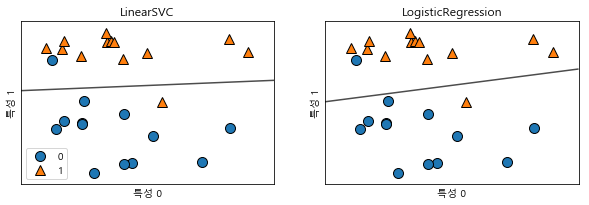

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression(solver='liblinear')], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax) # discreate_scatter
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

- SVM : hyper plane : f(X) = 0로 규정 / class 1, -1 분류
- Sigmoid : hyper plane : f(X) = 0.5로 규정 / class 1, 0 분류
- SVM은 확률을 직접 구하지 못하지만, Sigmoid는 확률을 직접 구할 수 있다.(predict_proba)
    - 방법
        - predict_proba(확률값 구하기) : Sigmoid만 해당
        - decision funcion(Score값 반환 양수면 1이되고, 음수면 0이 될 확률이 높다.)
        - predict(0인지 1인지 확인)
- 오류의 한계를 지정, 일부는 버린 모습.

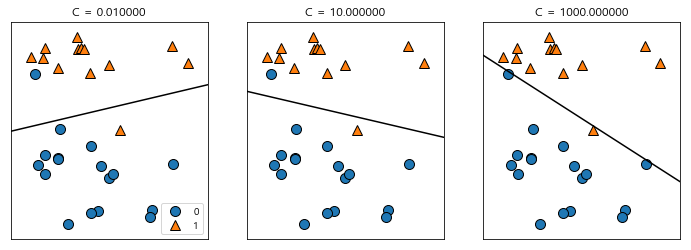

In [7]:
mglearn.plots.plot_linear_svc_regularization()

#### SVC, Logistic Reg에서의 alpha 표현 방법
- C = 1 / alpha 
- C는 alpha의 역수. 즉, Ridge나 Lasso에서 사용하는 L2, L1 loss를 다르게 표현함.

#### rule에 따라 solver를 선택해보자
- L1 penalty : liblinear, saga
- Multinomial loss : lbfgs sag saga newton-cg
- very large data set: sag saga
- binary class : liblinear
#### 참고
    - lbfgs : a ~ mv / matrix 차원 변환 = 근삿값 추정
    - Softmax(wx+b) : vector 반환 == energy function (에너지가 적으면 핵 주위에 분포, 크면 멀리 사라짐)
    - sigmoid(wx+b) : scalar 반환
    - ovr(one-vs-rest) : binary type일 경우 사용. multinomial 방식을 지원하지 않음. 학습 속도가 느리다.
    - binary class이 경우 liblinear가 가장 빠르지만, 범주의 수가 많아지면 느리다.
    - lbfgs, sag, newton-cg는 L2 penalty만 지원.
    - saga는 L1 penalty도 지원하므로, sparse multinomial logistic regression에 좋은 대안임.

___
#### LogisticRegression
#### cancer data
LogisticRegression(class_weight = )
- 정확도만 추구하다보면 흔치 않은 범주를 무시하여 잘못된 분류가 될 수 있음.
- 흔치 않은 분류 (악성)을 찾기 위해 weight를 더 주면 악성을 더 잘 찾을 수 있음.
LogisticRegression(solve = )
- rule에 따라 적절히 선택
    - sparse : lbfgs
    - sparse + L1 : saga
    - core 충분 : newton-cg
    
LogisticRegression(multi_class = )
- ovr or multinomial

LogisticRegression(normalize X )
- normalize 옵션이 없으므로, 직접 data에 normalize를 해줘야 한다.

#### 층화 추출
- 전체 데이터 : 400
- train, test data 나누는 방법. 
- default : 0.25 / 25% 비율 즉, 3 대 1
- stratify

In [11]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42) # random_state = randomseed(0) 
logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.958


- C 기본값 1.0 훈련과 테스트 모두 95%의 정확도를 보이고 있으나, undefit인 경우로 보이므로 C를 늘려본다

In [31]:
logreg100 = LogisticRegression(solver='liblinear', C=100).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.972
테스트 세트 점수: 0.965


- alpha가 커지면 underfitting, 작아지면 overfitting
- 따라서 c가 커지면 overfitting, 작아지면 underfitting

In [35]:
logreg001 = LogisticRegression(solver='liblinear', C=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.944
테스트 세트 점수: 0.944


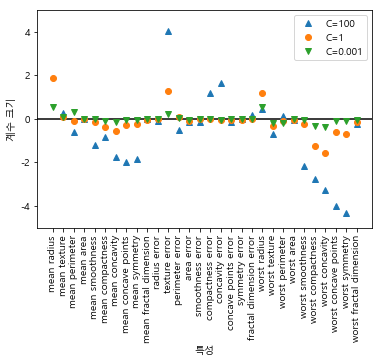

In [36]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

- mean perimeter : 작은 규제에서는 음수, 높은 규제에서는 양수를 가짐.
    - 이 의미는 종양의 평균 둘레는 양성 또는 음성의 신호가 모두 될 수 있다.
- 다중공선성 때문에 c 가 0.001일 경우에 나타나는 양수의 signal이 실제 의미 있다고 봐야한다.?

`LogisticRegression`의 `max_iter` 매개변수 기본값은 100입니다. 사이킷런 0.20 버전에서 수렴에 도달하지 못했다는 경고 메세지를 피하기 위해 1000으로 증가시킵니다.

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


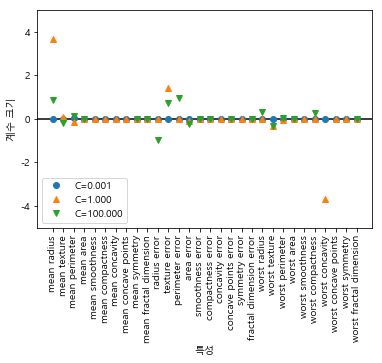

In [38]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

# coef shape = (1, n_features) 이므로 전치(T)시켜 준다.

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)

#### 다중 클래스 분류를 위한 선형 모델
\begin{align*}
\end{align*}

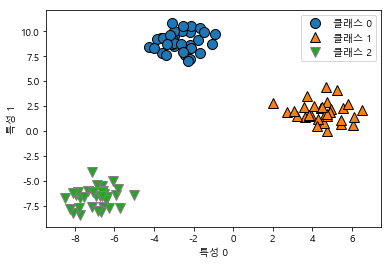

In [42]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

In [60]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [63]:
cancer['data'].shape

(569, 30)

In [64]:
cancer['target'].shape

(569,)

___
#### LinearSVC
LinearSVC (penalty = )
- L1, L2

LinearSVC (class_weight = )
- 위와 동일

LinearSVC (predict_proba X)
- LogisticReg와의 차이
- 단순히 decision function만을 제공해준다.

#### 3개의 범주가 있을 때 분류하는 방법
- 범주가 여러 개 일 때는, 각각의 범주에 최적화된 모델을 여러 개 만들게 된다.
- LogisticReg의 결과값
    - classes_ = array, shape(n_classes)
    - coef_ : array(1, n_features) or (n_classes, n_features)
    - intercept_ : array(1,) or (n_classes,)
    - n_iter : array, shape(n_classes,) or (1,)
 

In [43]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


In [46]:
print(linear_svm.coef_)
print(linear_svm.intercept_)

[[-0.17492185  0.23140964]
 [ 0.47621564 -0.06936991]
 [-0.18914178 -0.20400404]]
[-1.07745358  0.13140445 -0.08604983]


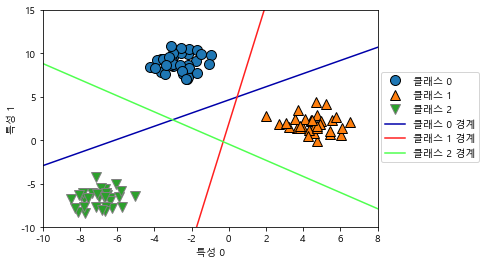

In [56]:
# 3개의 범주 분류
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))

Text(0, 0.5, '특성 1')

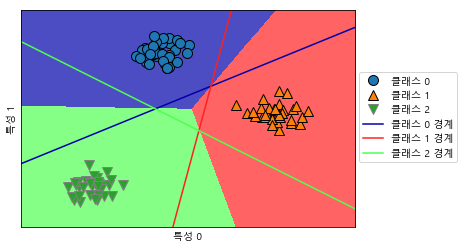

In [50]:
# 3개의 범주 분류
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

- class의 영향도에 따라 공존하는 공간을 나눌 수 있다.

#### 장단점과 파라미터

In [17]:
# 한 줄에서 모델의 객체를 생성과 학습을 한번에 실행합니다
logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [18]:
logreg = LogisticRegression(solver='liblinear')
y_pred = logreg.fit(X_train, y_train).predict(X_test)

In [19]:
y_pred = LogisticRegression(solver='liblinear').fit(X_train, y_train).predict(X_test)

## 0412
### Naive Bayes Classifiers(나이브 베이즈 분류기)
- 비가 온다 / 안온다 - 판별학습
- 비가 올 확률이 x%이다 - 확률론적 학습
    - 미래의 사건확률 추정을 위해 과거를 학습
- 확률추정을 위해 많은 속성을 고려할 때 적합.
- 조건부 확률 사용
- prior (선제확률, 사전 확률)
    - 실험 전 확률 + 관찰도수(빈도수)  = P(y)
- posterior (사후 확률)
    - prior의 2가지 요소를 이용해 확률을 구함. = P(y|X)
- likelihood
    - P(X|y) : y일 때, x에서 그 y에 해당하는 요소의 빈도 수 
- maginal prob
    - P(X) 
- P(y|X) = (P(X|y) / P(X)) * P(y)
- posterior = likelihood * prior
- 조건부 독립 = P(X1, X2 | y) = P(X1|y) * P(X2|y)
    - cf) 독립 = P(X1, X2) = P(X1) * P(X2)
#### 이용사례
- 스팸메일 필터링

#### 참고
보통 변수간의 독립된 관계설정으로 빠른 학습속도를 자랑하지만, 일반화 성능은 다소 낮다.  

scikitlearn.naive_bayes의 3가지 함수
- GaussianNB
    - 연속적인 input 데이터가 y에 대한 범주별로 특정 가우시안 분포를 갖는다고 가정하고, 새로운 데이터에 대한 분포 확률에 따라 범주를 추론한다.
- BernoulliNB
    - binary input 데이터에 적용하여 빈도를 통해 y범주별 이항확률 p를 구하여 추론. : 여러 개의 이항 변수 존재
- MultinomialNB
    - 명목 변수(words)에 대한 빈도 테이블 데이터에 적용하여 y범주별 X의 class 확률을 구하여 추론.
- alpha : smoothing priors. 
    - 확률이 0이 되는 것을 방지한다. 
    - 학습데이터 수가 적은 경우 더 작은 alpha값을 적용하자.
___
- partial_fit : online 업데이트 가능.
- class_prior : 각 class의 확률
- class _count : 각 class별 학습데이터의 수
- theta : class별 변수들의 mean
- sigma : class별 변수들의 var

#### 결론
- X_new에 대해 P(y=0) / P(y=1) 비교함으로써, y=0, 1을 판별한다.
- posterior = likelihood * prior
- multinomialNB
    - log를 이용해서 다 더하는 방법의 트릭을 사용함.
    - class_log_prior : 선형 모델로 MultinomialNB를 해석하기 위함
    - intercept : prior
    - coef == feature_log_prob
- Bernoulli Naive Bayes
    - 이항 분류
    - 베르누이이이이이잉
    - binarize
    - fit_prior
    - class_prior

#### 통계
- 빈도 주의
    - ex) 이길 경우의 수는 정해져있다. : 결정론적 세계관
- 베이지안 주의
    - 확률은 결정되어 있는 것이 아니라, 여러 요인에 의해 항상 변화할 것이다.
    - 모든 feature는 서로 연관이 있을 것이다.

In [15]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [18]:
from sklearn.naive_bayes import BernoulliNB
model_burn = BernoulliNB().fit(X, y)

print(model_burn.classes_)
print(model_burn.class_count_)
print(np.exp(model_burn.class_log_prior_))

[0 1]
[2. 2.]
[0.5 0.5]


In [19]:
counts = {}
for label in np.unique(y):
    # 각 클래스에 대해 반복
    # 특성마다 1 이 나타난 횟수를 센다.
    counts[label] = X[y == label].sum(axis=0)
print("특성 카운트:\n{}".format(counts))

특성 카운트:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


#### 장단점과 파라미터
- 현재 베이지안의 중요도가 많이 올라갔으며, 관련 논문도 쏟아지는 중.
- 여기서는 언급이 많이 안되었지만 베이지안에 대해서 잘 알고 있어야 할 것.